# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
print(df.shape)
df.head()

(804, 12)


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [5]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

<ipython-input-6-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
<ipython-input-6-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Cruise      199
Cylinder      0
Doors       190
Leather       0
Liter         0
Make          0
Mileage       5
Model         0
Price        17
Sound         0
Trim          0
Type          0
dtype: int64

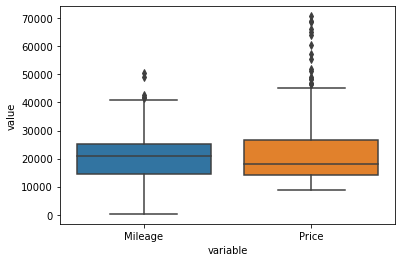

In [7]:
df = pd.DataFrame(data = df, columns = ['Mileage','Price'])
sns.boxplot(x="variable", y="value",data=pd.melt(df))
plt.show()

As the outliers present in 'Price' and 'Mileage' represent natural variations they should be retained in the dataset. These are called true outliers.

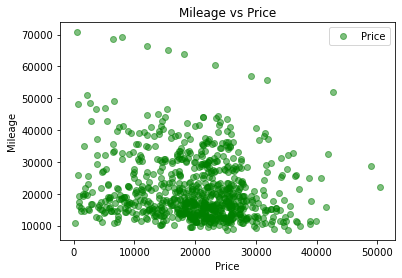

In [8]:
df.plot(x='Mileage', y='Price', style ="o",color='green',alpha=0.5)
plt.ylabel('Mileage')
plt.xlabel('Price')
plt.title('Mileage vs Price')
plt.show()

In [11]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


Correlation value of -0.143 means no linear relationship exists between Mileage and Price

## Tasks, Part 1

### 1. Find the linear regression equation for mileage vs price.

In [12]:
X = df[['Mileage']].values
y = df['Price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
print("Linear Regression equation : y = {:.3f} x + {:.3f}".format(regressor.coef_[0],regressor.intercept_))

Linear Regression equation : y = -0.120 x + 23701.613


### 2 .Chart the original data and the equation on the chart.

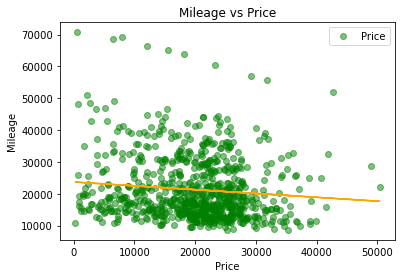

In [16]:
df.plot(x='Mileage', y='Price', style ="o",color='green',alpha=0.5)
plt.plot(X, regressor.predict(X), color ='orange')
plt.ylabel('Mileage')
plt.xlabel('Price')
plt.title('Mileage vs Price')
plt.show()

### 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [17]:
y_predict = regressor.predict(X_test)
print("R² Score :", r2_score(y_test,y_predict))

R² Score : 0.039431449593484214


Mileage feature has very low R² score = 0.03943 This means that it has no direct influence on Price.

## Tasks, Part 2

### 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.



In [18]:
df = pd.read_csv("car_data.csv")

In [19]:
feature = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

X = df[feature]
y = df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("Linear Regression equation : y = {:.3f} x1 + {:.3f} x2+ {:.3f} x3 + {:.3f} x4 + {:.3f} x5 + {:.3f} x6 + {:.3f} x7 + {:.3f}".format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.coef_[5],regressor.coef_[6],regressor.intercept_))

Linear Regression equation : y = -1083.519 x1 + 5844.050 x2+ -1171.721 x3 + -1381.197 x4 + 2553.492 x5 + -895.066 x6 + 1252.059 x7 + 21304.203


Price = 21304.203 -1083.519 Mileage + 5844.050 Cylinder -1171.721 Liter - 1381.197 Doors + 2553.492 Cruise -895.066 Sound + 1252.059 Leather

### 2. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
y_predict = regressor.predict(X_test)
print("R² Score :", r2_score(y_test,y_predict))

R² Score : 0.4362250031593877


R² score = 0.43622 which is not sufficient to be a good fit for this data.

### 3. Find the combination of the factors that is the best predictor for price.

In [23]:
def r2_scr(feature, df, Cost='Price'):
    in_put = df[feature]
    out_put = df[Cost]
    regressor = LinearRegression()
    regressor.fit(in_put,out_put)
    return regressor.score(in_put,out_put)
print('R^2 score for equation using all columns: {}'.format(r2_scr(feature,df)))

R^2 score for equation using all columns: 0.446264353672838


In [24]:
import itertools as it 

#itertools.combinations() module is used to print all possible combinations
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)

In [25]:
def all_combo_scores(combos, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[r2_scr(list(n), df, focus)] = n
    return combo_scores

In [26]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.446264353672838,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809261,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974422, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42441824017998775,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398466, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

In [27]:
df_Prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_Prediction.sort_index(axis = 0)

,Actual,Predicted
1,17542.036083,23719.500795
7,15048.042184,21883.975545
8,14862.093870,26467.105320
9,15295.018267,24123.829209
10,21335.852485,24946.539919
...,...,...
781,12119.089702,13362.553119
782,11679.923546,10469.268925
787,12105.981336,7912.828192
799,16507.070267,24788.934391


- From the above score combinations, the maximum R² score = 0.4462 is generated based on all the selected features. ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
- R² score is not sufficient to produce a strong relation.
- Further there is a huge variation between actual and predicted price values

## Tasks, Hard Mode

### 1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.


In [31]:
df = pd.read_csv("car_data.csv")

In [32]:
df_dum = pd.get_dummies(df[['Make','Model','Type']])
df_dum

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X = df_dum
y = df["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score

y_predict = regressor.predict(X_test)
print("R² Score :", r2_score(y_test,y_predict))

R² Score : 0.9409417785822343


Since R² Score = 0.94094 . The features Make, Model and type does fit in predicting the price

### 2. Find the best combination of factors to predict price.

In [35]:
df = pd.read_csv("car_data.csv")
to_encode = ['Make','Model','Type']

In [36]:
def combinations(Ft):
  if Ft:
    result = combinations(Ft[:-1])
    return result + [i+[Ft[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Type'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [37]:
R2_Score = []
for i in comb:
  X = df[i]
  y = df['Price'].values
  X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)
  
  if 'Mileage' in X_train:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train_scaled,y_train)
  y_predict = regressor.predict(X_test_scaled)
  R2_Score.append(r2_score(y_test,y_predict))

In [38]:
df_final = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
df_final

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
1018,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.979971
1019,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.979971
1020,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.979837
1021,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.979837


In [39]:
df_final['R2 Score'].max()

0.9801481574947476

In [40]:
df_final['Feature Combination'][df_final['R2 Score'].argmax()]

['Mileage', 'Liter', 'Leather', 'Make', 'Model', 'Type']

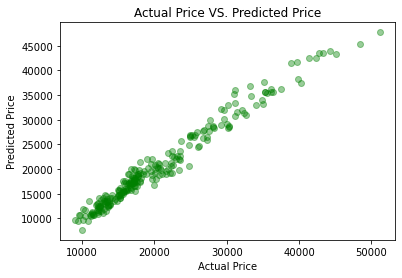

In [41]:
# Vizulaizing Actual & Predicted Price for the  best combination of factors ['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type'] to predict price

X = df[['Mileage', 'Liter', 'Leather', 'Make', 'Model', 'Type']]
y = df['Price'].values
X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)

plt.scatter(y_test,y_predict,color="Green",alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS. Predicted Price")
plt.show()

In [42]:
df_Prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_Prediction.sort_index(axis = 0)

,Actual,Predicted
0,13072.841631,13553.634588
1,12383.402811,11615.644411
2,26698.078151,27758.363962
3,18566.070703,19606.585242
4,19641.741902,17948.730940
...,...,...
237,42773.028390,43536.282662
238,13174.071009,14806.533254
239,15395.010874,14837.035147
240,29612.154048,32073.578266


'Mileage', 'Liter', 'Leather', 'Make', 'Model', 'Type' are the combination of the factors that best predict the price.

After using categorical variables along with numerical variable for the price prediction, we can see that the R² score = 0.98 which has increased and gives the best fit for the model.

The predicted price values are more or less the same as compared to the actual price value.